<a href="https://colab.research.google.com/github/henrykohl/Machine-Learning-demo-repo/blob/master/OnlineLectures/StatQuest/29_credit_card_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SUPPORT VECTOR MACHINES - ADVANCED

Based on: Support Vector Machines in Python from Start to Finish.
https://youtu.be/8A7L0GsBiLQ

Jungletronicss: SVM — Credit Card — Start to Finished
https://medium.com/jungletronics/svm-credit-card-start-to-finished-75210d644dec

DATE:
23/05/2021

[<font color="red">My Medium Note</font>](https://medium.com/@u860218/ea1a23706b1d)<br>
<font color="red">DATA : 2023

####Import the Modules that will do all the work

In [ ]:
import pandas as pd # pandas is used to load and manipulate data and for One-Hot Encoding
import numpy as np # data manipulation
import matplotlib.pyplot as plt # matplotlib is for drawing graphs
%matplotlib inline

####Import database

**Attribute Information:**

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:`

<b><font color="Green">X1</font></b>: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

<b><font color="Green">X2</font></b>: Gender (1 = male; 2 = female).

<b><font color="Green">X3</font></b>: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)

<b><font color="Green">X4</font></b>: Marital status (1 = married; 2 = single; 3 = others).

<b><font color="Green">X5</font></b>: Age (year).

<b><font color="Green">X6 - X11</font></b>: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: <b><font color="Green">X6</font></b> = the repayment status in September, 2005; <b><font color="Green">X7</font></b> = the repayment status in August, 2005; . . .;<b><font color="Green">X11</font></b> = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

<b><font color="Green">X12 - X17</font></b>: Amount of bill statement (NT dollar). <b><font color="Green">X12</font></b> = amount of bill statement in September, 2005; <b><font color="Green">X13</font></b> = amount of bill statement in August, 2005; . . .; <b><font color="Green">X17</font></b> = amount of bill statement in April, 2005.

<b><font color="Green">X18 - X23</font></b>: Amount of previous payment (NT dollar). <b><font color="Green">X18</font></b> = amount paid in September, 2005; <b><font color="Green">X19</font></b> = amount paid in August, 2005; . . .;<b><font color="Green">X23</font></b> = amount paid in April, 2005.

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients




<font color="red">下一個cell執行read_excel若出現錯誤 ["certificate verify failed: certificate has expired"](https://stackoverflow.com/questions/69794239/how-can-i-handle-the-error-certificate-verify-failed-certificate-has-expired). Solution:

import ssl

ssl._create_default_https_context = ssl._create_unverified_context



In [ ]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [ ]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [ ]:
df = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls',
            header=1, ## NOTE: header=1表示從第二row開始讀
            # sep='\t', ## NOTE: Pandas automatically detects delimeters,...
            )

In [ ]:
# df.info()

In [ ]:
df.rename({'default payment next month': 'DEFAULT'}, axis='columns', inplace=True) # 把column改名 , inplace=True 修改df而不copy出新的df
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
# Remove the ID Column cause it is not informative (set axis=0 to remove rows)
df.drop('ID', axis=1, inplace=True) # 把欄位'ID' 的column移除
df.head()


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


####Dealing w/ Missing Data

First, Let's see what sort of data is in each column:


In [ ]:
# df.dtypes

We see that every column is int64, which is good since it tells us that they don't mix letters and numbers :) There are no NA values. Let's make sure that each column contains acceptable values (please see descriptions above).

First, the sex column:

Gender (1 = male; 2 = female).

In [ ]:
# print(df['SEX'].unique())
# df['SEX'].unique()

Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)

Values 0,5 and 6 are unknown. It is possible that 0 is for missing data and 5 and 6 are not mentioned categories. That is just a guest :)

<font color="red">NOTE: the this dataset is part of an academic publiction that is not open access and is owned by <b>Elsevier</b>. So, in theory, I could pay a lot of money to get the article about this dataset and find out if <b>0</b> represents missing data or not. But since this is a demo, we won't worry too much about being correct and see what happens when we treat <b>0</b> as missing data. NOTE: I tried both ways and the model performs better when we treat <b>0</b> as missing data.

In [ ]:
# print(df['EDUCATION'].unique())
# df['EDUCATION'].unique()

Marital status (1 = married; 2 = single; 3 = others)

In [ ]:
# print(df['MARRIAGE'].unique())
# df['MARRIAGE'].unique()

Like EDUCATION, MARRIAGE contains 0, which we are guessing represents the missing data.


In [ ]:
# dicti1 = { '0': 1, '1': 2, '2': 1}
# dicti2 = { '0': 4, '1': 5, '2': 6}
# d01 = pd.DataFrame({ 'column 1' : dicti1, 'column 2' : dicti2 })
# d01

In [ ]:
# d01.drop('column 1', axis=1, inplace=True) # 沿著 axis=1(橫)軸，找到'column 1'，將整個column刪除
# d01.drop('0', axis=0, inplace=True)     # 沿著 axis=0(縱)軸，找到'0'，將整個row刪除

In [ ]:
# df.loc[df['EDUCATION']] == 0 # 左邊df的結果，當中的每一個cell值==0顯示True，否則顯示False
# df['EDUCATION'] 會取出'EDUCATION'此column 所有(row)的值(每一row有一個)
# df中的每一個row的'EDUCATION'值(如 x)對應到df['EDUCATION']的row id (如 y) ，則此row x，整個由row y所取代

<font color="red">Since scikit-learn's support vector machines do not support datasets with missing values, we need to figure out what to do with the 0s in the dataset. We can either delete these customers from the training dataset, or impute values for the missing data. First let's see how many rows contain missing values.

In [ ]:
# len(df.loc[(df['EDUCATION'] == 0) | (df['MARRIAGE'] == 0)])

<font color="red">So, only 68 rows have missing values. Now let's count the total number of rows in the dataset...

<font color="red">So <b>68</b> of the <b>30,000</b> rows, or less than <b>1%</b>, contain missing values. Since that still leaves us with more data than we need for a <b>Support Vector Machine</b>, we will remove the rows with missing values, rather than try to impute their values (<b>NOTE</b>: We'll cover how to impute values in a future webinar). We do this by selecting all of the rows that do not contain <b>0</b> in either the <b>EDUCATION</b> or <b>MARRIAGE</b> columns:

In [ ]:
df_no_missing = df.loc[(df['EDUCATION'] != 0) & (df['MARRIAGE'] != 0)]

In [ ]:
# len(df_no_missing)

That is: 30000 - 68

Just
Doing the Math:

Missing data represents 0,0022 or least than 0.23% of the database :)



In [ ]:
# (1 - ((30000-68)/30000))*100

In [ ]:
import seaborn as sns

<Axes: >

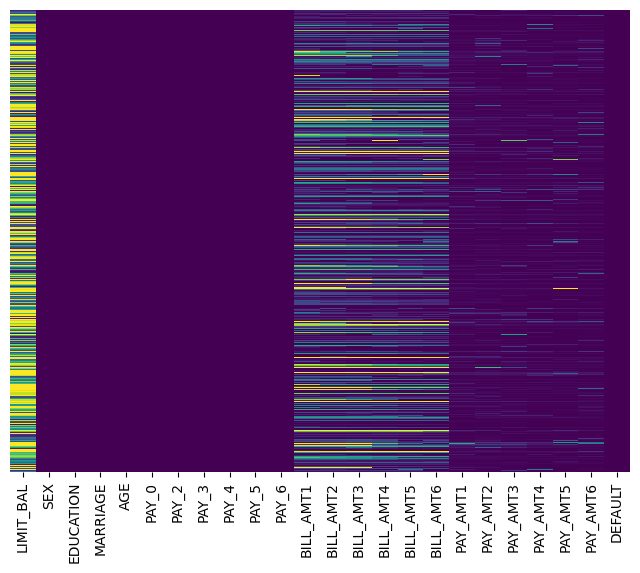

In [ ]:
plt.figure(figsize=(8,6))

sns.heatmap(df_no_missing, yticklabels=False, cbar=False, robust=True, cmap='viridis') # 顯示熱力圖
# df_no_missing 數據集
# yticklabels 設定y軸刻度
# cbar 顏色條
# robust 如果“Ture”和“ vmin或” vmax不存在，则使用强分位数计算颜色映射范围，而不是极值。
# camp 設定顏色
# https://medium.com/python/cf1b17d7964e 參考


THE FIRST HALF OF THE DATABASE ARE NOW READY TO GO! (column from 1 to 10th ;)

In [ ]:
# print(df_no_missing['EDUCATION'].unique())
# print(df_no_missing['MARRIAGE'].unique())

###Downsampling the database

Let's remind ourselves how many customers are in the dataset:

<font color="red"><b>Support Vector Machines</b> are great with small datasets, but not awesome with large ones, and this dataset, while not huge, is big enough to take a long time to optimize with <b>Cross Validation</b>. So we'll downsample both categories, customers who did and did not default, to 1000 each.


In [ ]:
# len(df_no_missing)

SVM works better in a reasonable database. Let's get 1,000 of each category.

We start by splitting the database into two, one for people that are paying (default) regularly credit card debt, and the other for people that the debt goes unpaid (no_default)

default payment (Yes = 1, No = 0)

In [ ]:
df_no_default = df_no_missing[df_no_missing['DEFAULT']==0]
df_default = df_no_missing[df_no_missing['DEFAULT']==1]

In [ ]:
# len(df_no_default), len(df_default)

In [ ]:
from sklearn.utils import resample
df_no_default_downsampled = resample(df_no_default, replace=False, n_samples=1000, random_state=42 ) # replace=True 取出的那一row的資料，可能還會被取
len(df_no_default_downsampled)

1000

In [ ]:
from sklearn.utils import resample
df_default_downsampled = resample(df_default, replace=False, n_samples=1000, random_state=42 ) # replace=True 取出的那一row的資料，可能還會被取
len(df_default_downsampled)

1000

Now merging the databases bacK:

In [ ]:
df_downsample = pd.concat([df_no_default_downsampled, df_default_downsampled ] ) # default ,axis=0
len(df_downsample)

2000

####Train Data Splitting

<font color="red">The first step is to split the data into two parts:
1. The columns of data that we will use to make classifications
2. The column of data that want to predict.

<font color="red">We will use the conventional notation of <b>X</b> to represent the columns of data that we will use to make classifications and <b>y</b> to represent the thing we want to predict. In this case, we want to predict <b>default</b> (whether or not someone defaulted on a payment).

In [ ]:
X = df_downsample.drop('DEFAULT', axis=1).copy() # Alternatively: X = df_dow.iloc[:, :-1].copy()
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
641,130000,2,3,1,28,0,0,0,0,-2,...,50000,0,0,0,2500,1000,0,0,0,0
4678,170000,1,3,1,29,0,0,0,0,0,...,172307,35234,32869,33862,7200,7500,1200,1200,1500,1300
16004,180000,2,2,1,29,0,0,0,0,0,...,26310,26662,26166,26176,1800,1800,1500,1056,950,1000
22974,210000,2,2,2,32,-2,-2,-2,-2,-2,...,410,0,0,0,979,412,0,0,0,0
17535,190000,2,3,1,45,0,0,0,0,0,...,80548,81778,83082,84811,3300,3331,3359,2663,2751,3000


In [ ]:
y = df_downsample['DEFAULT'].copy()
y.head()

641      0
4678     0
16004    0
22974    0
17535    0
Name: DEFAULT, dtype: int64

<font color="red">Now that we have created <b>X</b>, which has the data we want to use to make predictions, and <b>y</b>, which has the data we want to predict, we are ready to continue formatting <b>X</b> so that it is suitable for making a <b>Support Vector Machine</b>.

####Hot Encoding procedures

<font color="red">There are many different ways to do <b>One-Hot Encoding</b> in Python. Two of the more popular methods are `ColumnTransformer()`(from <b>scikit-learn</b>) and `get_dummies()` (from <b>pandas</b>), and the both methods have pros and cons.

get_dummies 參考 https://www.datalearner.com/blog/1051637141445141

df = pd.DataFrame(
    [
        [1000, "male", 23],
        [1001, "female", 22],
        [1002, "male", 69]
    ],
    columns=['id', 'gender', 'age']
).set_index("id")
/# step 1: using get_dummies to encode gender feature
dummy_df = pd.get_dummies(df[["gender"]]) # 從 df 選取 'gender' 這一column的值進行one-hot coding，結果會是多個columns

/# step 2: concat dummy_df with original df
df = pd.concat([df, dummy_df], axis=1)

/# step 3: remove original feature
df.drop("gender", axis=1, inplace=True)

/# 此結果非常近似於step 1 + step 2 只是 column 順序有所不同
/# df = pd.get_dummies(df, columns=["gender"])

In [ ]:
X_encoded = pd.get_dummies(X, columns=['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'])
X_encoded.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
641,130000,28,100143,50456,50000,0,0,0,2500,1000,...,0,1,0,0,0,0,0,0,0,0
4678,170000,29,165027,168990,172307,35234,32869,33862,7200,7500,...,0,0,0,1,0,0,0,0,0,0
16004,180000,29,25781,26000,26310,26662,26166,26176,1800,1800,...,0,0,0,1,0,0,0,0,0,0
22974,210000,32,355,975,410,0,0,0,979,412,...,0,1,0,0,0,0,0,0,0,0
17535,190000,45,76433,78472,80548,81778,83082,84811,3300,3331,...,0,0,0,1,0,0,0,0,0,0


###Centering & Scaling the Data

sklearn.preprocessing.scale 參考 https://zhuanlan.zhihu.com/p/120780686

In [ ]:
from sklearn.model_selection import train_test_split # 對 data 分割

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)
# X_tain: training data, X_test: testing data, y_train: data label for training, y_test: data label for testing

In [ ]:
from sklearn.preprocessing import scale # 對 data 標準化

X_train_scaled = scale(X_train) # default axis=0(縱)軸
X_test_scaled = scale(X_test)  # default axis=0(縱)軸

###Building a preliminary SVM

<font color="red">At long last, the data is correctly formatted for making a Support Vector Machine!!! So let's do it.

In [ ]:
from sklearn.svm import SVC

clf_svm = SVC(random_state = 42)
clf_svm.fit(X_train_scaled, y_train)

SVC(random_state=42)

SVC
1. makes an untrained shell of a support vector classifier

slf_svm <- SVC
2. we're saving that shell as classifier underscore support vector machine

clf_svm.fit
3.  to call fit using that shell and so what we're doing is we're fitting it or we're training it on the training data so we've got X train scale.

###Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
# from sklearn.metrics import plot_confusion_matrix # deprecated 廢棄了
from sklearn.metrics import ConfusionMatrixDisplay

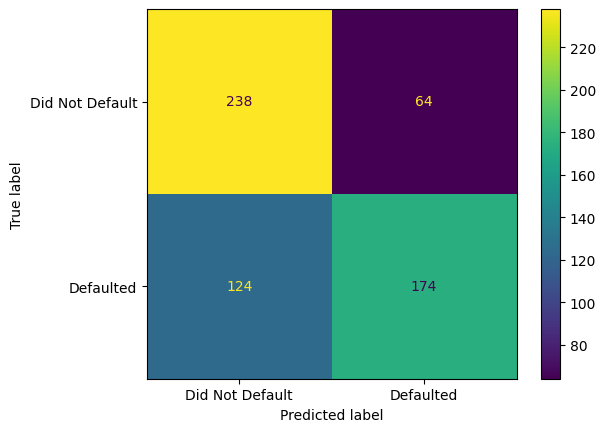

In [ ]:
# plot_confusion_matrix(clf_svm, X_test_scaled, y_test, values_format='d', display_labels=['Did Not Default', 'Defaulted']) # deprecated 廢棄了

predictions = clf_svm.predict(X_test_scaled)
cm = confusion_matrix(y_test, predictions, labels=clf_svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Did Not Default', 'Defaulted'])
disp.plot()

plt.show()
# 參考 https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

###Analyzing Confusion Matrix

From 238 + 64  = 302 people that Did Not Default, 64 was missclassified (21%)

From 124 + 174 = 298 people that Defaulted, 124 was missclassified (41.610%)

That is not acceptable! <font color="red">So the <b>Support Vector Machine</b> was not awesome. So let's try to improve predictions using <b>Cross Validation</b> to optimize the parameters. So let's try to improve predictions using <b>Cross Validation</b>to optimize the parameters.

Let's fix it!

###Cross-Validation & GridSearch - Optimization Techniques

<font color="red">Optimizing a <b>Support Vector Machine</b> is all about finding the best value for <b>gamma</b>, and, potentially, the regularization parameter, <b>C</b>. So let's see if we can find better parameters values using cross validation in hope that we can improve the accuracy with the <b>Testing Dataset</b>.

<font color="red">Since we have two parameters to optimize, we will use `GridSearchCV()`. We specify a bunch of potential values for <b>gamma</b> and <b>C</b>, and `GridSearchCV()` tests all possible combinations of the parameters for us.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.5,1,10,100,], 'gamma':['scale', 1,0.1, 0.01,0.001,0.0001], 'kernel':['rbf']}
# StatQuest影片中 C沒有0.1與1000
# we including C=1 (values for C must be ＞ 0 ) and gamma = 'scale' cause these are default values;
# rbf = radial basis function, cause typically it gives us the best performance
# visit: Radial basis function https://en.wikipedia.org/wiki/Radial_basis_function
optimal_params = GridSearchCV(
    SVC(),          ## we pass in the shell of a support vector classifier
    param_grid,       ## we pass in the parameter
    cv = 5,         ## the number of folds of cross-validation we want to do
    scoring='accuracy',   ## we pass in the scoring metric we want to usd
    ## (accuracy is default scoring) Slightly improved, but hardly!!
    ## scoring='balanced_accuracy', Slightly improved, but hardly!! C=1, gamma=0.01
    ## scoring='f1', Terrible!! C=0.5, gamma=1
    ## scoring='f1_micro', Slightly improved, but hardly!!! C=1, gamma=0.01
    ## scoring='f1_macro', Same!! C=1, gamma='scale' (the same as default values)
    ## scoring='f1_weighted', Same!! gamma='scale'  (the same as default values)
    ## scoring='roc_auc', Terrible!! C=1, gamma=0.001
    verbose=0)        ## If you want to see what Grid Search is doing, set verbose=2

In [ ]:
# optimal_params

In [ ]:
optimal_params.fit(X_train_scaled, y_train)
print(optimal_params.best_params_)

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}


The ideal value for C = 1, which mean we will use regularization, and the ideal value for gamma = 0.01

<font color="red">And we see that the ideal value for `C` is <b>100</b>, which means we will use regularization, and the ideal value for `gamma` is <b>0.001</b>

<font color="red">Now that we have the ideal values for `C` and `gamma` we can build the final <b>Support Vector Machine</b>.

In [ ]:
# StatQuest影片沒有此cell
# grid_predictions = optimal_params.predict(X_test) # 有警告
# grid_predictions = optimal_params.predict(X_test_scaled)

In [ ]:
clf_svm = SVC(random_state = 42, C=1, gamma=0.01)
# clf_svm = SVC(random_state = 42, C=100, gamma=0.001) # StatQuest影片
clf_svm.fit(X_train_scaled, y_train)

SVC(C=1, gamma=0.01, random_state=42)

In [ ]:
# plot_confusion_matrix(clf_svm, X_test_scaled, y_test, values_format='d', display_labels=['Did Not Default', 'Defaulted']) # deprecated

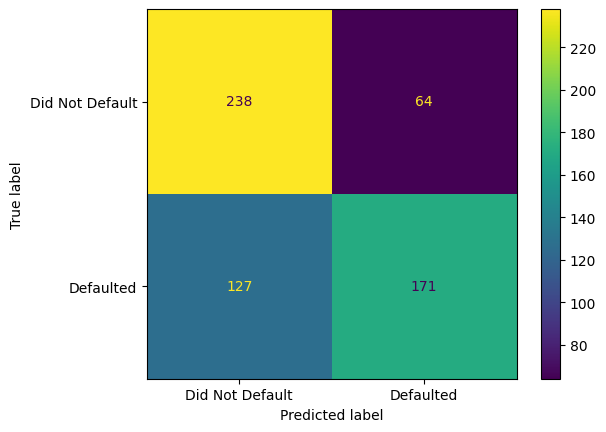

In [ ]:
predictions = clf_svm.predict(X_test_scaled)
cm = confusion_matrix(y_test, predictions, labels=clf_svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Did Not Default', 'Defaulted'])
disp.plot()

plt.show()

###Analysing Confusion Matrix Again

From 238 + 64  = 302 people that Did Not Default, 64 was missclassified (21%)

From 127 + 171 = 298 people that Defaulted, 127 was missclassified (42.617%)

A bit worse :/

Why?

Let's try to plot the graph of boundary decision regions.

This is a very complicated step.

Let's get started!

In [ ]:
len(df_downsample.columns)

24

This will be required a 24-dimension graph. That is impossible…how to overcome

this problem?

The answers:

PCA (Principal Components Analysis)

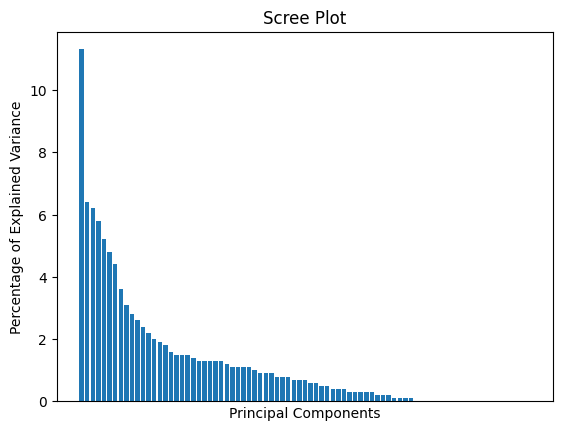

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()  # NOTE: By default, PCA() centers the data, but does not scale it.
X_train_pca = pca.fit_transform(X_train_scaled) ## fit_transform:幾算出統計結果，在根據結果對data進行轉換
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = [str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1, len(per_var)+1), height=per_var)
plt.tick_params(
    axis='x',     # changes apply to the x-axis
    which = 'both', # both major and minor ticks are affected
    bottom=False,   # ticks along the bottom edge are off
    top=False,     # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Components')
plt.title('Scree Plot')
plt.show()

# Let's retrain fitting the Data with PCA

pc1 Contains the x-axis coordinates of the data after PCA

pc2 Contains the y-axis coordinates of the data after PCA

<font color="red">The screen plot shows that the first principal component, PC1, accounts for a relatively large amount of variation in the raw data, and this means that it will be a good candidate for the x-axis in the 2-dimensional graph. However, PC2 is not much different from PC3 or PC4, which doesn't bode well for dimension reduction.Since we don't have a choice, let's go with it, but don't be suprised if the final graph looks funky.

<font color="red">Now we will draw the PCA graph. NOTE: This code is quite technical, but we don't have to type it in and there are commnets that explain each step. First, let's optimize an SVM fit to PC1 and PC2.

In [ ]:
train_pc1_coords = X_train_pca[:, 0] ## vector 向量
train_pc2_coords = X_train_pca[:, 1] ## vector 向量


## NOTE
## pc1 contains the x-axis coordinates of the data after PCA
## pc2 contains the y-axis coordinates of the data after PCA

#Centering & Scaling
pca_train_scaled = scale(np.column_stack((train_pc1_coords, train_pc2_coords))) # numpy.column_stack(tup)

## Now we optimize the SVM fit to the x and y-axis coordinates
## of the data after PCA dimension reduction...
param_grid = {'C':[0.5,0.1,1,10,100,1000], 'gamma':['scale', 1,0.1, 0.01,0.001,0.0001], 'kernel':['rbf']}
# we including C=1 and gamma = 'scale' cause these are default values;
# rbf = radial basis function, cause typically it gives us the best performance
# visit: Radial basis function https://en.wikipedia.org/wiki/Radial_basis_function
optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv = 5,
    scoring='accuracy',  ## NOTE: The default value for scoring results in worse performance...
    verbose=0)       ## 原本是3，StatQuest用0

optimal_params.fit(pca_train_scaled, y_train)
print(optimal_params.best_params_)


{'C': 1000, 'gamma': 'scale', 'kernel': 'rbf'}


###Decision Boundary Graph

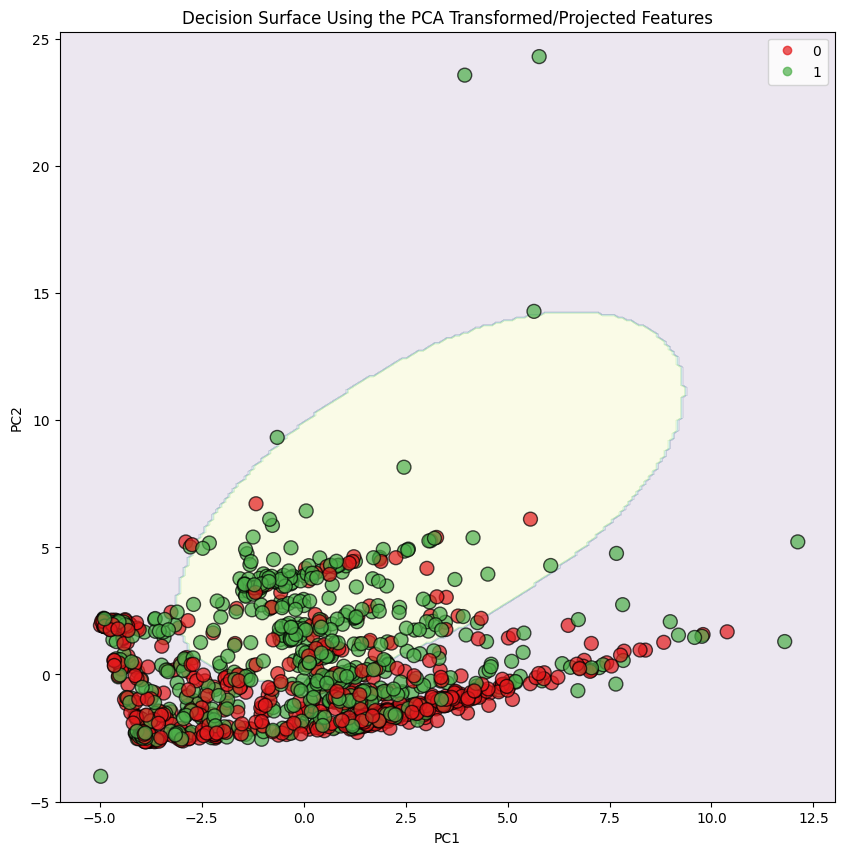

In [ ]:
import matplotlib.colors as colors


clf_svm = SVC(random_state=42, C=1000, gamma=0.001)
clf_svm.fit(pca_train_scaled, y_train)
## Transform the test dataset with the PCA... 這裡怪怪的
X_test_pca = pca.transform(X_train_scaled)
## X_test_pca = pca.transform(X_test_scaled) # StatQuest有包含此行，但卻mark起來，而去執行上一行

test_pc1_coords = X_test_pca[:, 0]
test_pc2_coords = X_test_pca[:, 1]
## Now create a matrix of points that we can use to show
## the decision regions.
## The matrix will be a little bit larger than the
## transformed PCA ponts so that we can plot all of
## the PCA points on it with out them being on the edge
x_min = test_pc1_coords.min()-1
x_max = test_pc1_coords.max()+1

y_min = test_pc2_coords.min()-1
y_max = test_pc2_coords.max()+1

xx, yy = np.meshgrid(np.arange(start=x_min, stop=x_max, step=0.1),np.arange(start=y_min, stop=y_max, step=0.1) )
"""xx, yy 都是2維，shape也相同。"""
Z = clf_svm.predict(np.column_stack((xx.ravel(), yy.ravel())))
""".ravel把2維變1維，np.column_stack變成2維，row是一筆data，column是pca，Z變成1維，是column vector"""

Z = Z.reshape(xx.shape)
"""reshape把1維轉成2維"""

fig, ax = plt.subplots(figsize=(10,10))

ax.contourf(xx,yy, Z, alpha=0.1)
"""畫出等高面積。Z的每一個元素值為 0 或 1，所以等高面積只有兩種不同顏色"""

cmap = colors.ListedColormap(['#e41a1c', '#4daf4a'])
"""顏色對應表"""

scatter = ax.scatter(test_pc1_coords, test_pc2_coords, c=y_train, cmap=cmap, s=100, edgecolors='k', alpha=0.7)
"""scatter是matplotlib.collections.PathCollection物件"""

legend = ax.legend(scatter.legend_elements()[0], scatter.legend_elements()[1], loc='upper right')
# legend = ax.legend(*scatter.legend_elements(), loc='upper right') # 上式也可改成
"""https://www.osgeo.cn/matplotlib/gallery/lines_bars_and_markers/scatter_with_legend.html"""

legend.get_texts()[0].set_text('No Defaults')
legend.get_texts()[1].set_text('Yes Defaults')
# legend.get_texts()會回傳<a list of 2 Text objects>，每一個object包含x=0, y=0, text=''等三項
"""https://matplotlib.org/stable/api/text_api.html#matplotlib.text.Text"""

ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_title('Decision Surface Using the PCA Transformed/Projected Features')


plt.savefig('svm_defaults.png')
"""存檔"""

plt.show()
# """沒此行圖也會顯示，但會出現物件位置標記"""
# """https://www.cnblogs.com/MTandHJ/p/10850415.html (legend的add_artist)"""


In [ ]:
legend.get_texts()

<a list of 2 Text objects>

In [ ]:
# print("We studied: 'default of credit card clients Data Set' from UCI.\nThat's it! I hope this helps!\nThank you!")

We studied: 'default of credit card clients Data Set' from UCI.
That's it! I hope this helps!
Thank you!


#Appendix

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


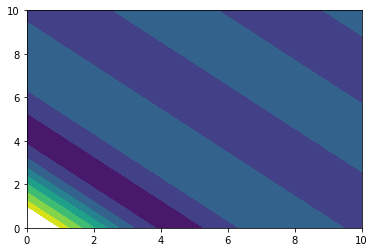

In [ ]:
import matplotlib.pyplot as plt
x = np.arange(0,11)

y = np.arange(0,11)


xx, yy = np.meshgrid(x, y, sparse=True)
#print(xx)
#print(yy)
z = np.sin(xx + yy) / (xx + yy)

h = plt.contourf(x,y,z)
plt.show()